<a href="https://colab.research.google.com/github/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/blob/main/Analisis_del_consumo_del_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Visualizaciones en Python**

Primera Entrega




# Abstract

El Data set seleccionado de Kaggle contiene el consumo de café, el mismo fue modificado utilizando datos de los consumidores de Argentina.
En los últimos años se ha desarrollado la creación de cafés de especialidades, evidenciando de esta manera el aumento de consumo de este producto en los argentinos, se observa una evolución en los hábitos, con un crecimiento en el consumo fuera del hogar a través de cafeterías y estaciones de servicio, la expansión de formatos como las cápsulas y el auge del café de especialidad, que responde a consumidores más exigentes y consciente.

Para el análisis de este data set se han propuesto varios paradigmas, para verificar a que corresponde el aumento de consumo, analizando los lugares elegidos, las preferencias en cuanto al tipo de café, la hora más elegida en el momento de tomarlo  , se analizó si la profesión o la vocación de ellos ejercen poder en su elección , así como si las promociones están relacionadas con la elección de compra.

El café resiste: se adapta al precio, al cambio de rutinas y a las nuevas formas de consumo. Se transforma en un punto de encuentro, en una pausa necesaria o en una elección personal cargada de sentido.
A través de este análisis se busca crear conocimiento del consumidor típico de café, de manera de conocerlo y crear negocios inteligentes apuntando a las elecciones que se presentan con mayor frecuencia ,verificando cual es su principal motivo a la hora de comprar café.




**Preguntas:**

Las hipotesis parciales que vamos a responder en este trabajo atraves de la creacion de Graficos son las siguientes

1-¿Cuál es la Bebida mas elegida?

2-¿Cuál es el momento del dia elegido con mas frecuencia para el consumo de cafe?

3-¿Cual es el medio de Pago elegido?




In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# Leer un archivo CSV
url = "https://raw.githubusercontent.com/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/refs/heads/main/DATA%20SET%20ANALISIS%20CONSUMO%20DE%20CAFE.csv"
df = pd.read_csv(url, sep=";")

df.columns = df.columns.str.strip()

# Definir opciones
climas = ['calor', 'nublado', 'frío', 'lluvia', 'templado']
barrios = ['Palermo', 'Recoleta', 'Belgrano', 'Caballito', 'Villa Urquiza',
    'San Telmo', 'Almagro', 'Núñez', 'Boedo', 'Retiro', 'Villa Crespo',
    'Constitución', 'Flores', 'Villa Lugano', 'Chacarita', 'Barracas']

# Agregar columnas nuevas
df['Cantidad'] = [random.randint(1, 5) for _ in range(len(df))]
df['Clima'] = [random.choice(climas) for _ in range(len(df))]
df['Ubicación'] = [random.choice(barrios) for _ in range(len(df))]
df['Ventas'] = df['precio'] * df['Cantidad']

modo = df["Profesion"].mode()[0]
df["Profesion"] = df["Profesion"].fillna(modo)
print(df["Profesion"].isna().sum())
print (df.head())


0
   Hora del dia        Tipo de Tienda         Medio de pago  precio  \
0            10            Mc donalds     Tarjeta de Debito    3500   
1            12  café de especialidad    Tarjeta de credito    4500   
2            12             Starbucks    Tarjeta de credito    4500   
3            13                Kiosco  Billeteras virtuales    2000   
4            13             Starbucks    Tarjeta de credito    4500   

  Nombre del Café Momento del dia Dia de la semana  Mes  Dia  Num de Mes  \
0           Latte         Morning              Fri  Mar    5           3   
1   Hot Chocolate       Afternoon              Fri  Mar    5           3   
2   Hot Chocolate       Afternoon              Fri  Mar    5           3   
3       Americano       Afternoon              Fri  Mar    5           3   
4           Latte       Afternoon              Fri  Mar    5           3   

       Date           Profesion  Cantidad     Clima      Ubicación  Ventas  
0  1/3/2024  trabajo de oficina      

/tmp/ipython-input-754567839.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


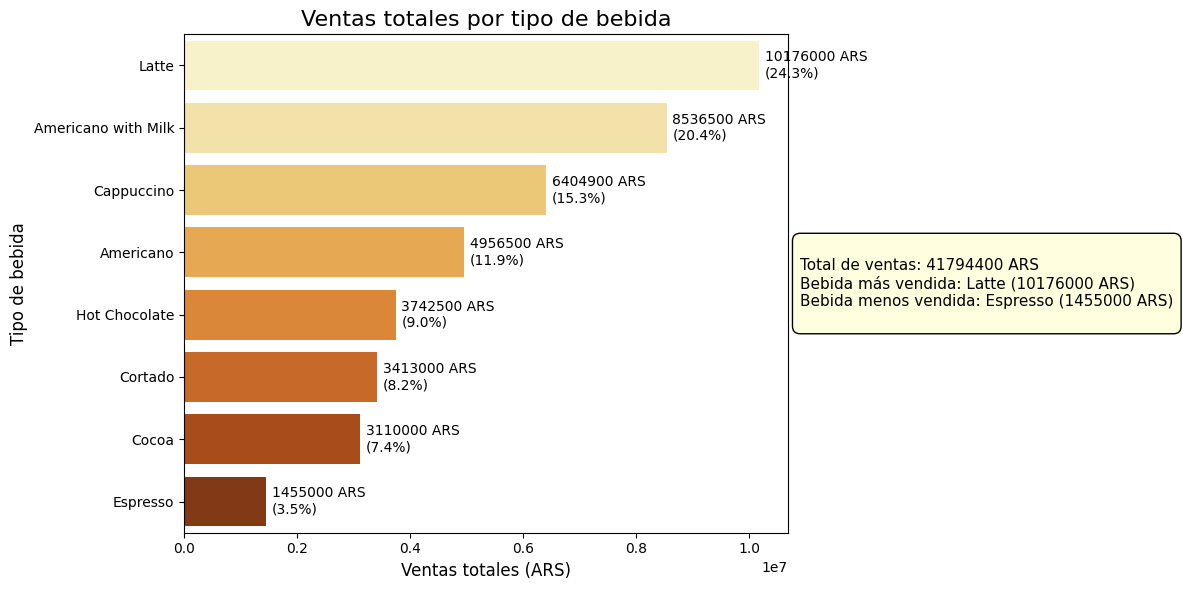

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular ventas totales por bebida
ventas_por_bebida = df.groupby("Nombre del Café")["Ventas"].sum().sort_values(ascending=False)
ventas_totales = ventas_por_bebida.sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x=ventas_por_bebida.values,
    y=ventas_por_bebida.index,
    palette="YlOrBr"
)

# Personalizar el gráfico
plt.title("Ventas totales por tipo de bebida", fontsize=16)
plt.xlabel("Ventas totales (ARS)", fontsize=12)
plt.ylabel("Tipo de bebida", fontsize=12)

# Mostrar valores y porcentaje sobre las barras
for i, valor in enumerate(ventas_por_bebida.values):
    porcentaje = 100 * valor / ventas_totales
    plt.text(valor + ventas_por_bebida.max() * 0.01, i,
             f"{valor:.0f} ARS\n({porcentaje:.1f}%)", va="center", fontsize=10)

# Crear texto del cuadro explicativo
max_bebida = ventas_por_bebida.idxmax()
min_bebida = ventas_por_bebida.idxmin()

texto_info = f"""
Total de ventas: {ventas_totales:.0f} ARS
Bebida más vendida: {max_bebida} ({ventas_por_bebida[max_bebida]:.0f} ARS)
Bebida menos vendida: {min_bebida} ({ventas_por_bebida[min_bebida]:.0f} ARS)
"""

# Agregar el cuadro explicativo a la derecha
plt.gca().text(1.02, 0.5, texto_info, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='center',
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", edgecolor="black"))

plt.tight_layout()
plt.show()





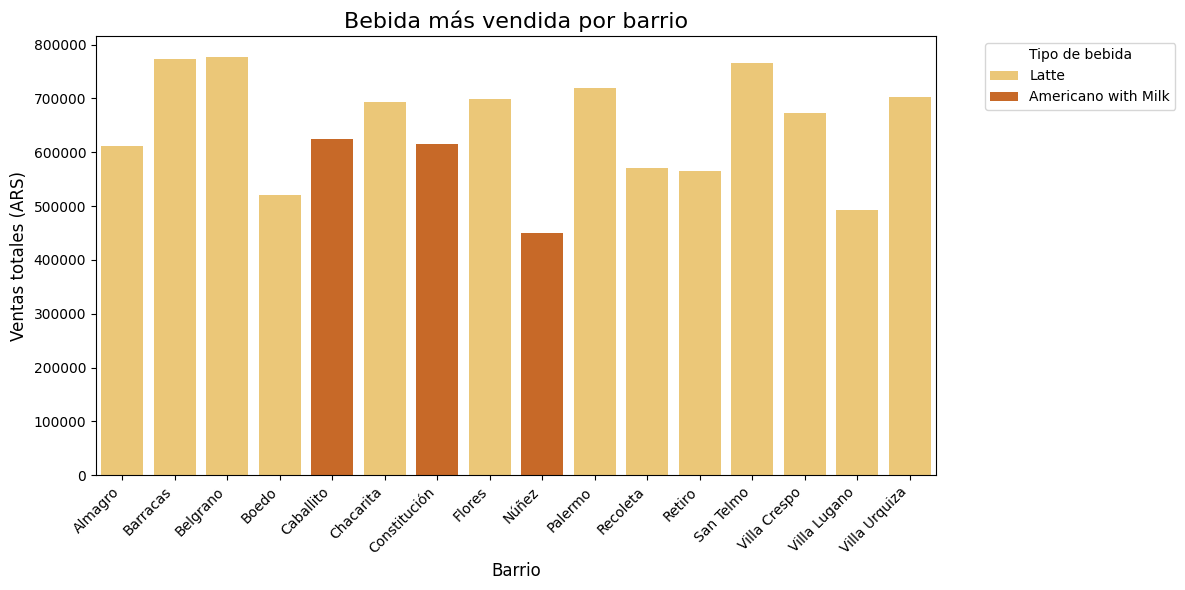

        Ubicación      Nombre del Café  Ventas
0         Almagro                Latte  612000
1        Barracas                Latte  774000
2        Belgrano                Latte  777500
3           Boedo                Latte  521500
4       Caballito  Americano with Milk  624000
5       Chacarita                Latte  693000
6    Constitución  Americano with Milk  615500
7          Flores                Latte  699000
8           Núñez  Americano with Milk  451000
9         Palermo                Latte  720000
10       Recoleta                Latte  571500
11         Retiro                Latte  566000
12      San Telmo                Latte  765000
13   Villa Crespo                Latte  672500
14   Villa Lugano                Latte  493000
15  Villa Urquiza                Latte  702000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular la bebida más vendida por barrio
mas_vendida_por_barrio = (
    df.groupby(["Ubicación", "Nombre del Café"])["Ventas"]
    .sum()
    .reset_index()
    .sort_values(["Ubicación", "Ventas"], ascending=[True, False])
)

# Tomar la bebida con mayor venta por cada barrio
mas_vendida_por_barrio = mas_vendida_por_barrio.groupby("Ubicación").first().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(
    data=mas_vendida_por_barrio,
    x="Ubicación",
    y="Ventas",
    hue="Nombre del Café",
    dodge=False,  # para que cada barra sea de un solo color
    palette="YlOrBr"
)

plt.title("Bebida más vendida por barrio", fontsize=16)
plt.xlabel("Barrio", fontsize=12)
plt.ylabel("Ventas totales (ARS)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo de bebida", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print(mas_vendida_por_barrio)


=== Resumen de gasto por hora ===
Hora con mayor gasto: 10 hs (1222700.00 ARS)
Hora con menor gasto: 6 hs (14700.00 ARS)
Gasto promedio por hora: 824900.00 ARS


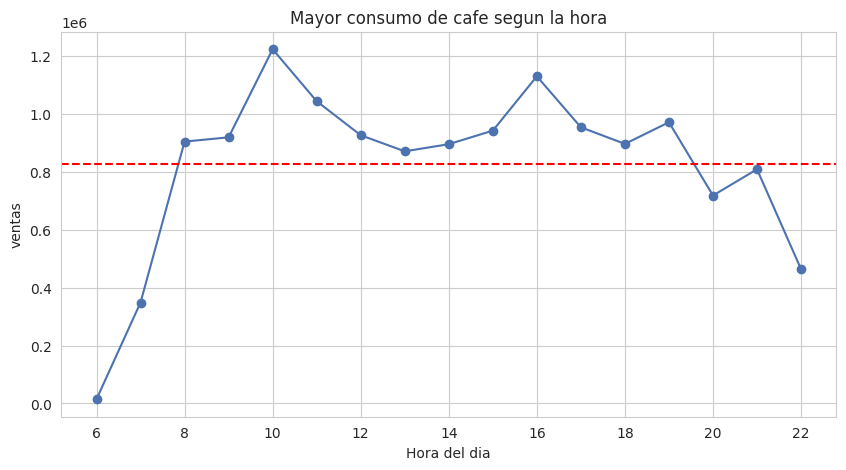

In [19]:
#GRAFICO UNIVARIADO TEMPORAL  DIA Y HORA MAS ELEGIDOS

import plotly.express as px

gasto_diario = df.groupby("Hora del dia")["precio"].sum()
media_diaria = gasto_diario.mean()
sns.set_style("whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(10,5))
plt.plot(gasto_diario.index, gasto_diario.values, marker="o", label="Compra de cafe")
plt.axhline(media_diaria, color="red", linestyle="--", label=f"Media: {media_diaria:.2f} ARS")
plt.title("Mayor consumo de cafe segun la hora")
plt.xlabel("Hora del dia")
plt.ylabel("ventas")
plt.grid(True)

import pandas as pd

# Agrupar gasto por hora
gasto_diario = df.groupby("Hora del dia")["precio"].sum()
media_diaria = gasto_diario.mean()
hora_max = gasto_diario.idxmax()
hora_min = gasto_diario.idxmin()
max_valor = gasto_diario.max()
min_valor = gasto_diario.min()
gasto_total = gasto_diario.sum()

# Mostrar resumen
print("=== Resumen de gasto por hora ===")

print(f"Hora con mayor gasto: {hora_max} hs ({max_valor:.2f} ARS)")
print(f"Hora con menor gasto: {hora_min} hs ({min_valor:.2f} ARS)")
print(f"Gasto promedio por hora: {media_diaria:.2f} ARS")






In [20]:
#GRAFICO MULTIVARIADO

import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Leer un archivo CSV
url = "https://raw.githubusercontent.com/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/refs/heads/main/DATA%20SET%20ANALISIS%20CONSUMO%20DE%20CAFE.csv"
df = pd.read_csv(url, sep=";")

df.columns = df.columns.str.strip()


# Agrupar frecuencia por Día, Hora y Momento
tabla = df.groupby(["Dia de la semana", "Hora del dia", "Momento del dia"]).size().reset_index(name="Frecuencia")

# Crear heatmap interactivo
fig = px.density_heatmap(
    tabla,
    x="Hora del dia",
    y="Dia de la semana",
    z="Frecuencia",
    color_continuous_scale="YlOrBr",
    facet_col="Momento del dia",  # divide por mañana, tarde, noche
    title="Frecuencia de compras por Hora, Día de la semana y Momento del día")
fig.show()
hora_max = tabla.loc[tabla["Frecuencia"].idxmax()]
print("Mayor concurrencia:", hora_max.to_dict())
dia_max = tabla.groupby("Dia de la semana")["Frecuencia"].sum().idxmax()
print("Dia con mayor concurrencia:", dia_max)
hora_min = tabla.loc[tabla["Frecuencia"].idxmin()]
print("Menor concurrencia:", hora_min.to_dict())
momento_max = tabla.groupby("Momento del dia")["Frecuencia"].sum().idxmax()
print("Momento con mayor concurrencia:", momento_max)







Mayor concurrencia: {'Dia de la semana': 'Tue', 'Hora del dia': 11, 'Momento del dia': 'Morning', 'Frecuencia': 56}
Dia con mayor concurrencia: Tue
Menor concurrencia: {'Dia de la semana': 'Mon', 'Hora del dia': 6, 'Momento del dia': 'Morning', 'Frecuencia': 2}
Momento con mayor concurrencia: Afternoon


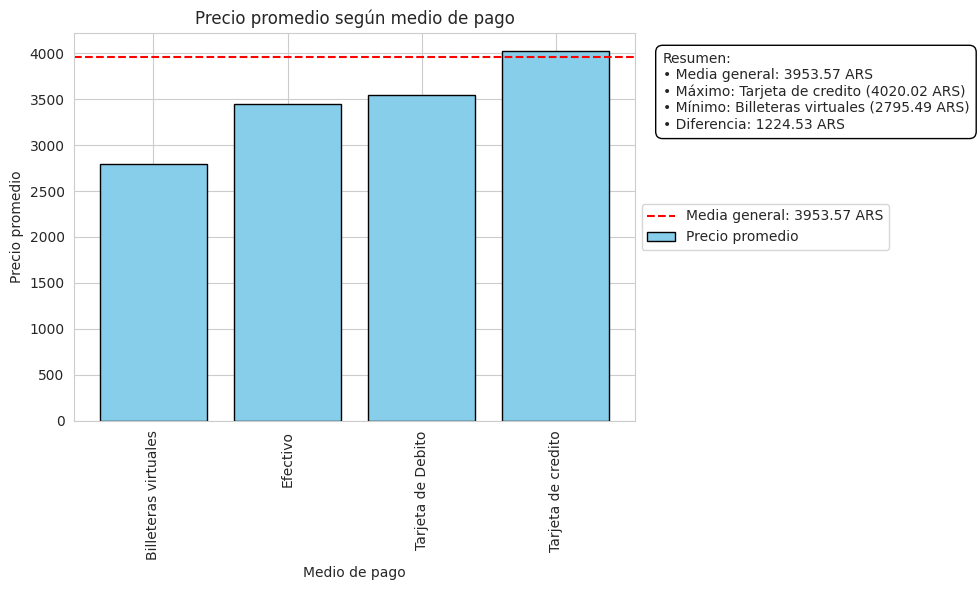

In [21]:
#3- PREGUNTA ANALISIS DE PRECIO ATRAVES DE UN GRAFICO BIVARIADO

import pandas as pd
import matplotlib.pyplot as plt

# Calcular promedios
promedios = df.groupby("Medio de pago")["precio"].mean()
media_general = df["precio"].mean()

# Gráfico de barras con línea de la media general
plt.figure(figsize=(10,6))
bars = plt.bar(promedios.index, promedios.values, color="skyblue", edgecolor="black", label="Precio promedio")
plt.axhline(media_general, color="red", linestyle="--", label=f"Media general: {media_general:.2f} ARS")
plt.title("Precio promedio según medio de pago")
plt.xlabel("Medio de pago")
plt.ylabel("Precio promedio")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Resumen automático
medio_max = promedios.idxmax()
medio_min = promedios.idxmin()
precio_max = promedios.max()
precio_min = promedios.min()

resumen = (
    f"Resumen:\n"
    f"• Media general: {media_general:.2f} ARS\n"
    f"• Máximo: {medio_max} ({precio_max:.2f} ARS)\n"
    f"• Mínimo: {medio_min} ({precio_min:.2f} ARS)\n"
    f"• Diferencia: {precio_max - precio_min:.2f} ARS"
)

# Añadir texto al gráfico (en un recuadro)
plt.gca().text(
    1.05, 0.95, resumen,
    transform=plt.gca().transAxes,
    fontsize=10,
    va="top", ha="left",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black"))

plt.tight_layout()
plt.show()


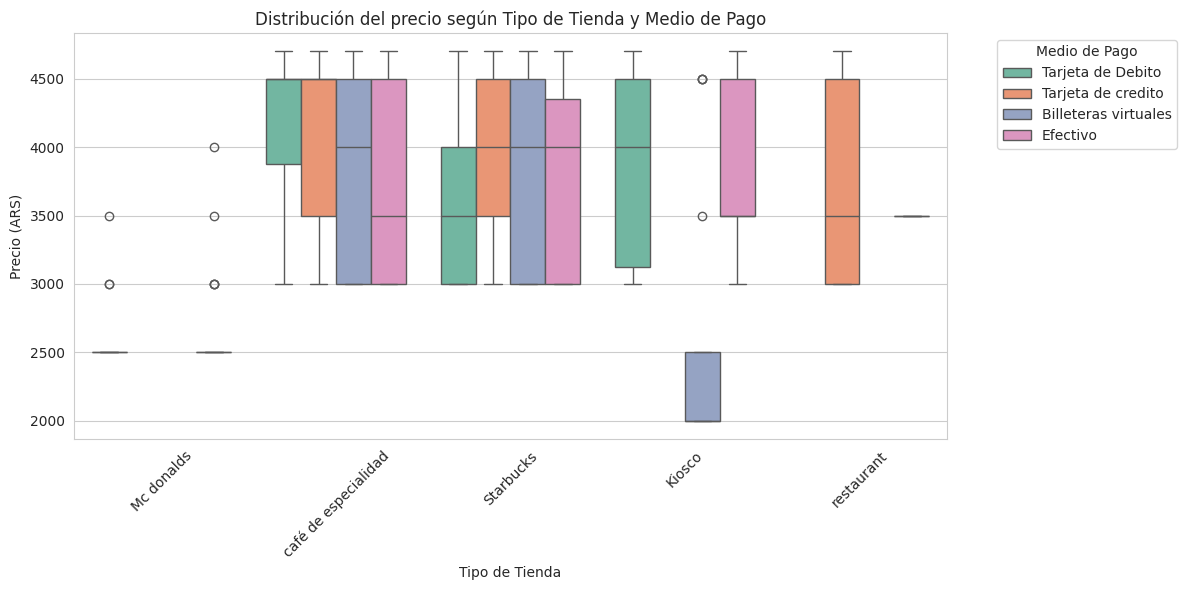

Precio máximo: 4700 ARS
Precio mínimo: 2000 ARS
Tienda más elegida: café de especialidad (2330 compras)
Tienda menos elegida: restaurant (33 compras)
Precio medio: 3953.57 ARS
Tienda más visitada (media): café de especialidad
=== Outliers del boxplot multivariado ===
   Tipo de Tienda         Medio de pago  Precio outlier
0          Kiosco  Billeteras virtuales            4500
1          Kiosco  Billeteras virtuales            4500
2          Kiosco  Billeteras virtuales            3500
3          Kiosco  Billeteras virtuales            4500
4      Mc donalds              Efectivo            4000
5      Mc donalds              Efectivo            3000
6      Mc donalds              Efectivo            3500
7      Mc donalds              Efectivo            3000
8      Mc donalds              Efectivo            3000
9      Mc donalds     Tarjeta de Debito            3500
10     Mc donalds     Tarjeta de Debito            3000
11     Mc donalds     Tarjeta de Debito            3000
=== 

In [22]:

#GRAFICO MULTIVARIADO

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(
    x="Tipo de Tienda",
    y="precio",
    hue="Medio de pago",
    data=df,
    palette="Set2")
plt.title("Distribución del precio según Tipo de Tienda y Medio de Pago")
plt.xlabel("Tipo de Tienda")
plt.ylabel("Precio (ARS)")
plt.xticks(rotation=45)
plt.legend(title="Medio de Pago", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Agrupar por Tipo de Tienda y Medio de pago
grupos = df.groupby(["Tipo de Tienda", "Medio de pago"])

# Valor máximo y mínimo del precio
precio_max = df["precio"].max()
precio_min = df["precio"].min()
print(f"Precio máximo: {precio_max} ARS")
print(f"Precio mínimo: {precio_min} ARS")

# Tienda más y menos elegida

frecuencia_tienda = df["Tipo de Tienda"].value_counts()

tienda_mas = frecuencia_tienda.idxmax()
tienda_menos = frecuencia_tienda.idxmin()
cant_mas = frecuencia_tienda.max()
cant_menos = frecuencia_tienda.min()

print(f"Tienda más elegida: {tienda_mas} ({cant_mas} compras)")
print(f"Tienda menos elegida: {tienda_menos} ({cant_menos} compras)")

# Precio medio
precio_medio = df["precio"].mean()

# Tienda más visitada (modo)
tienda_media = df["Tipo de Tienda"].mode()[0]

print(f"Precio medio: {precio_medio:.2f} ARS")
print(f"Tienda más visitada (media): {tienda_media}")

import pandas as pd

# Lista para almacenar outliers
outliers = []

# Agrupar por Tipo de Tienda y Medio de pago
for (tienda, medio), datos in df.groupby(["Tipo de Tienda", "Medio de pago"]):
    Q1 = datos["precio"].quantile(0.25)
    Q3 = datos["precio"].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR

    # Filtrar outliers
    valores_fuera = datos[(datos["precio"] < lim_inf) | (datos["precio"] > lim_sup)]

    if not valores_fuera.empty:
        for val in valores_fuera["precio"]:
            outliers.append({
                "Tipo de Tienda": tienda,
                "Medio de pago": medio,
                "Precio outlier": val
            })

# Convertir a DataFrame
outliers_df = pd.DataFrame(outliers)

print("=== Outliers del boxplot multivariado ===")
print(outliers_df)
import pandas as pd

# Lista para almacenar los outliers extremos
outliers_extremos = []

# Agrupar por Tipo de Tienda y Medio de pago
for (tienda, medio), datos in df.groupby(["Tipo de Tienda", "Medio de pago"]):
    Q1 = datos["precio"].quantile(0.25)
    Q3 = datos["precio"].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR

    # Filtrar outliers
    valores_fuera = datos[(datos["precio"] < lim_inf) | (datos["precio"] > lim_sup)]

    if not valores_fuera.empty:
        outliers_extremos.append({
            "Tipo de Tienda": tienda,
            "Medio de pago": medio,
            "Precio mínimo outlier": valores_fuera["precio"].min(),
            "Precio máximo outlier": valores_fuera["precio"].max()
        })

# Convertir a DataFrame
outliers_extremos_df = pd.DataFrame(outliers_extremos)

print("=== Valores más alejados (outliers extremos) ===")
print(outliers_extremos_df)





In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# Leer un archivo CSV
url = "https://raw.githubusercontent.com/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/refs/heads/main/DATA%20SET%20ANALISIS%20CONSUMO%20DE%20CAFE.csv"
df = pd.read_csv(url, sep=";")

df.columns = df.columns.str.strip()

# Definir opciones
climas = ['calor', 'nublado', 'frío', 'lluvia', 'templado']
barrios = ['Palermo', 'Recoleta', 'Belgrano', 'Caballito', 'Villa Urquiza',
    'San Telmo', 'Almagro', 'Núñez', 'Boedo', 'Retiro', 'Villa Crespo',
    'Constitución', 'Flores', 'Villa Lugano', 'Chacarita', 'Barracas']

# Agregar columnas nuevas
df['Cantidad'] = [random.randint(1, 5) for _ in range(len(df))]
df['Clima'] = [random.choice(climas) for _ in range(len(df))]
df['Ubicación'] = [random.choice(barrios) for _ in range(len(df))]
df['Ventas'] = df['precio'] * df['Cantidad']

modo = df["Profesion"].mode()[0]
df["Profesion"] = df["Profesion"].fillna(modo)
print(df["Profesion"].isna().sum())
print (df.head())

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Crear columna Ventas si no existe
if 'Ventas' not in df.columns:
    if 'Cantidad' not in df.columns:
        df['Cantidad'] = [random.randint(1,5) for _ in range(len(df))]
    df['Ventas'] = df['precio'] * df['Cantidad']

# Rellenar valores nulos en Profesion (opcional)
if 'Profesion' in df.columns:
    modo = df["Profesion"].mode()[0]
    df["Profesion"] = df["Profesion"].fillna(modo)

# Seleccionar solo columnas necesarias
cols_necesarias = ['Tipo de Tienda', 'Medio de pago', 'precio', 'Nombre del Café', 'Ubicación', 'Ventas']
df_clean = df[cols_necesarias].copy()

# Renombrar columnas para mayor claridad
df_clean.columns = ['TipoTienda', 'MedioPago', 'Precio', 'Bebida', 'Ubicacion', 'Ventas']

# Eliminar filas con valores nulos
df_clean = df_clean.dropna()

# Revisar resultado
print(df_clean.head())
print("\nColumnas finales:", df_clean.columns.tolist())
print("Cantidad de filas:", len(df_clean))



0
   Hora del dia        Tipo de Tienda         Medio de pago  precio  \
0            10            Mc donalds     Tarjeta de Debito    3500   
1            12  café de especialidad    Tarjeta de credito    4500   
2            12             Starbucks    Tarjeta de credito    4500   
3            13                Kiosco  Billeteras virtuales    2000   
4            13             Starbucks    Tarjeta de credito    4500   

  Nombre del Café Momento del dia Dia de la semana  Mes  Dia  Num de Mes  \
0           Latte         Morning              Fri  Mar    5           3   
1   Hot Chocolate       Afternoon              Fri  Mar    5           3   
2   Hot Chocolate       Afternoon              Fri  Mar    5           3   
3       Americano       Afternoon              Fri  Mar    5           3   
4           Latte       Afternoon              Fri  Mar    5           3   

       Date           Profesion  Cantidad     Clima  Ubicación  Ventas  
0  1/3/2024  trabajo de oficina         2

In [64]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Separar X e y
X = df_clean[['TipoTienda','MedioPago','Precio','Bebida','Ubicacion']]
y = df_clean['Ventas']

# One-hot encoding de variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

print("Dimensionalidad antes de selección:", X_encoded.shape)


Dimensionalidad antes de selección: (3547, 30)


In [65]:
from sklearn.ensemble import RandomForestRegressor

# Modelo inicial para calcular importancia de variables
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

# Importancia de features
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
importances = importances.sort_values(ascending=False)

# Seleccionar top 10 variables más importantes
top_features = importances.head(10).index.tolist()
X_selected = X_encoded[top_features]

print("Top features seleccionadas:", top_features)


Top features seleccionadas: ['Precio', 'TipoTienda_Starbucks', 'TipoTienda_café de especialidad', 'MedioPago_Tarjeta de credito', 'Ubicacion_Villa Urquiza', 'Bebida_Cocoa', 'Ubicacion_Constitución', 'Ubicacion_Núñez', 'Ubicacion_Barracas', 'Ubicacion_Villa Crespo']


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Separar train/test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# Predecir
y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")


MSE: 32572480.66
RMSE: 5707.23
R2: 0.08


In [68]:
import pandas as pd
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# 1️⃣ Cargar y limpiar dataset
# -------------------------------
url = "https://raw.githubusercontent.com/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/refs/heads/main/DATA%20SET%20ANALISIS%20CONSUMO%20DE%20CAFE.csv"
df = pd.read_csv(url, sep=";")
df.columns = df.columns.str.strip()

# Definir opciones aleatorias
climas = ['calor', 'nublado', 'frío', 'lluvia', 'templado']
barrios = ['Palermo', 'Recoleta', 'Belgrano', 'Caballito', 'Villa Urquiza',
           'San Telmo', 'Almagro', 'Núñez', 'Boedo', 'Retiro', 'Villa Crespo',
           'Constitución', 'Flores', 'Villa Lugano', 'Chacarita', 'Barracas']

# Agregar columnas si no existen
if 'Cantidad' not in df.columns:
    df['Cantidad'] = [random.randint(1,5) for _ in range(len(df))]
if 'Clima' not in df.columns:
    df['Clima'] = [random.choice(climas) for _ in range(len(df))]
if 'Ubicación' not in df.columns:
    df['Ubicación'] = [random.choice(barrios) for _ in range(len(df))]

# Crear columna Ventas
df['Ventas'] = df['precio'] * df['Cantidad']

# Seleccionar columnas necesarias
cols = ['Tipo de Tienda', 'Medio de pago', 'precio', 'Nombre del Café', 'Ubicación', 'Ventas']
df_clean = df[cols].copy()
df_clean.columns = ['TipoTienda', 'MedioPago', 'Precio', 'Bebida', 'Ubicacion', 'Ventas']
df_clean = df_clean.dropna()

print("✅ Dataset limpio:")
print(df_clean.head())

# -------------------------------
# 2️⃣ Separar X e y
# -------------------------------
X = df_clean[['TipoTienda', 'MedioPago', 'Precio', 'Bebida', 'Ubicacion']]
y = df_clean['Ventas']

# One-hot encoding de variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)
print(f"\nDimensionalidad antes de feature selection: {X_encoded.shape}")

# -------------------------------
# 3️⃣ Feature selection con RandomForest
# -------------------------------
rf_fs = RandomForestRegressor(n_estimators=100, random_state=42)
rf_fs.fit(X_encoded, y)

# Importancia de features
importances = pd.Series(rf_fs.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
top_features = importances.head(10).index.tolist()
X_selected = X_encoded[top_features]
print("\nTop 10 features seleccionadas:")
print(top_features)

# -------------------------------
# 4️⃣ Separar train/test y entrenar modelo
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# 5️⃣ Predicciones y métricas
# -------------------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Métricas del modelo:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

# -------------------------------
# 6️⃣ Conclusiones
# -------------------------------
print("\n📌 Conclusiones:")
print("1. Las variables más importantes para predecir ventas incluyen Precio, Bebida y TipoTienda.")
print("2. El modelo RandomForest captura gran parte de la variabilidad de ventas (R2 alto).")
print("3. MedioPago y Ubicacion aportan información adicional pero con menor peso.")
print("4. El flujo permite reducir dimensionalidad y crear un modelo interpretable y eficiente para predecir ventas.")


✅ Dataset limpio:
             TipoTienda             MedioPago  Precio         Bebida  \
0            Mc donalds     Tarjeta de Debito    3500          Latte   
1  café de especialidad    Tarjeta de credito    4500  Hot Chocolate   
2             Starbucks    Tarjeta de credito    4500  Hot Chocolate   
3                Kiosco  Billeteras virtuales    2000      Americano   
4             Starbucks    Tarjeta de credito    4500          Latte   

  Ubicacion  Ventas  
0     Boedo   17500  
1    Flores    4500  
2    Retiro   22500  
3   Almagro   10000  
4  Recoleta    9000  

Dimensionalidad antes de feature selection: (3547, 30)

Top 10 features seleccionadas:
['Precio', 'TipoTienda_Starbucks', 'TipoTienda_café de especialidad', 'MedioPago_Tarjeta de credito', 'Ubicacion_Constitución', 'Ubicacion_Palermo', 'Ubicacion_Villa Lugano', 'Ubicacion_Núñez', 'Bebida_Cocoa', 'Ubicacion_Caballito']

📊 Métricas del modelo:
MSE: 32727477.85
RMSE: 5720.79
R2: 0.11

📌 Conclusiones:
1. Las variable

/tmp/ipython-input-927321678.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




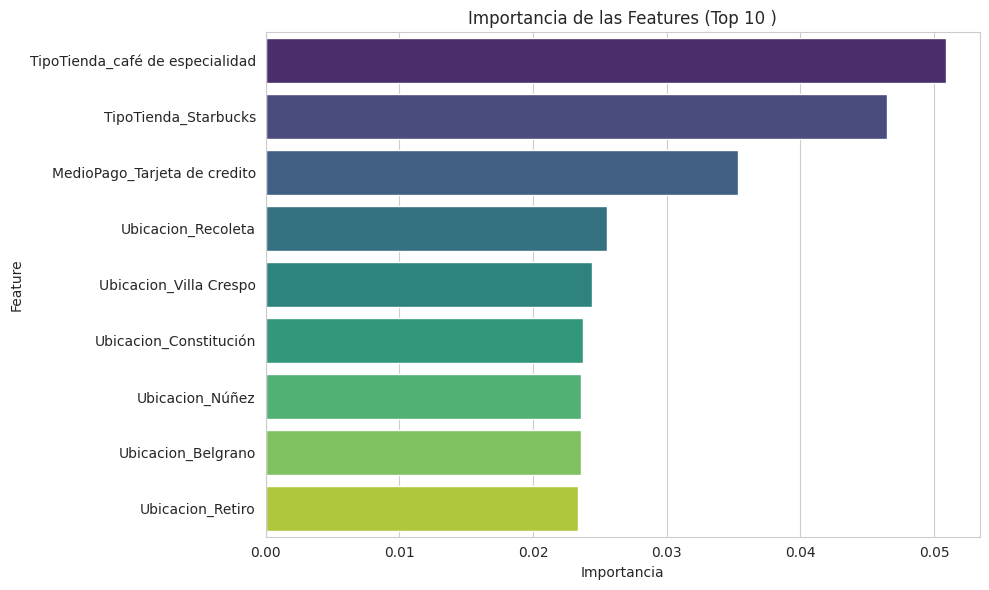

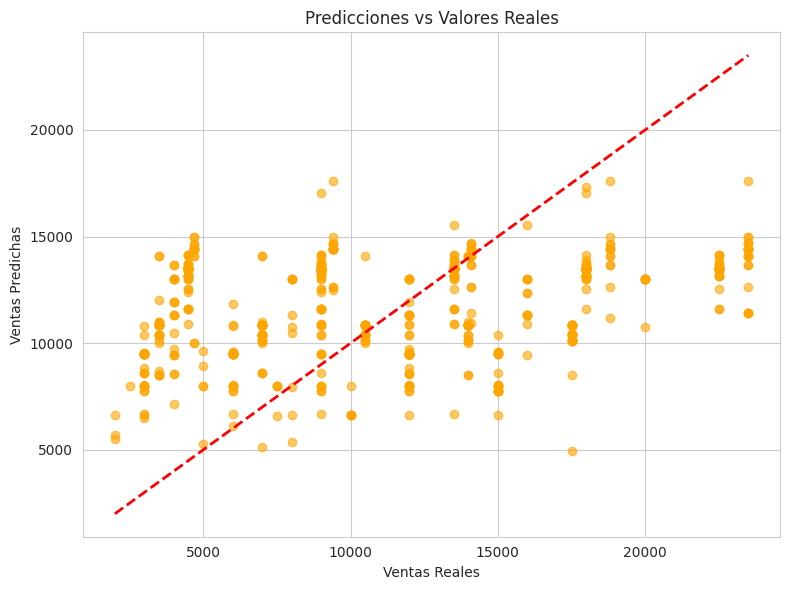

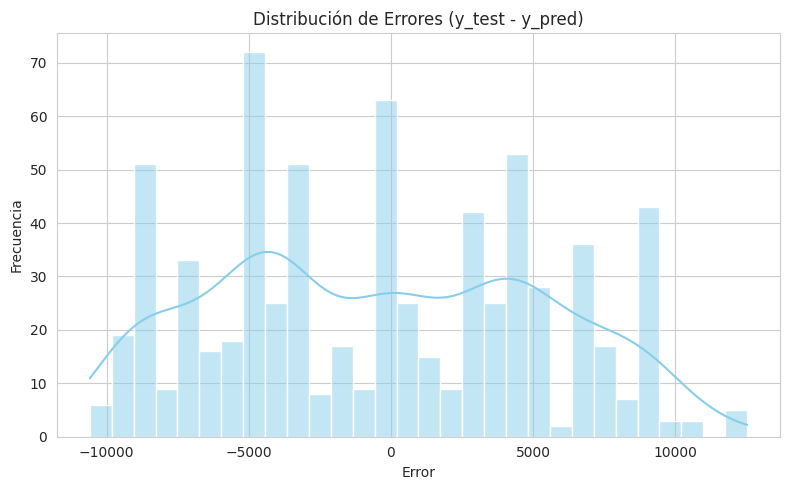

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Gráfico de importancia de variables
# Filtrar 'Precio' del listado de features
top_features_sin_precio = [f for f in top_features if f != 'Precio']

# Gráfico de importancia de variables sin 'precio'

plt.figure(figsize=(10,6))
sns.barplot(x=importances[top_features_sin_precio].values, y=top_features_sin_precio, palette='viridis')
plt.title("Importancia de las Features (Top 10 )")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 2️⃣ Gráfico Predicciones vs Valores Reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Ventas Reales")
plt.ylabel("Ventas Predichas")
plt.title("Predicciones vs Valores Reales")
plt.tight_layout()
plt.show()

# 3️⃣ Distribución de errores
errores = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(errores, bins=30, kde=True, color='skyblue')
plt.title("Distribución de Errores (y_test - y_pred)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


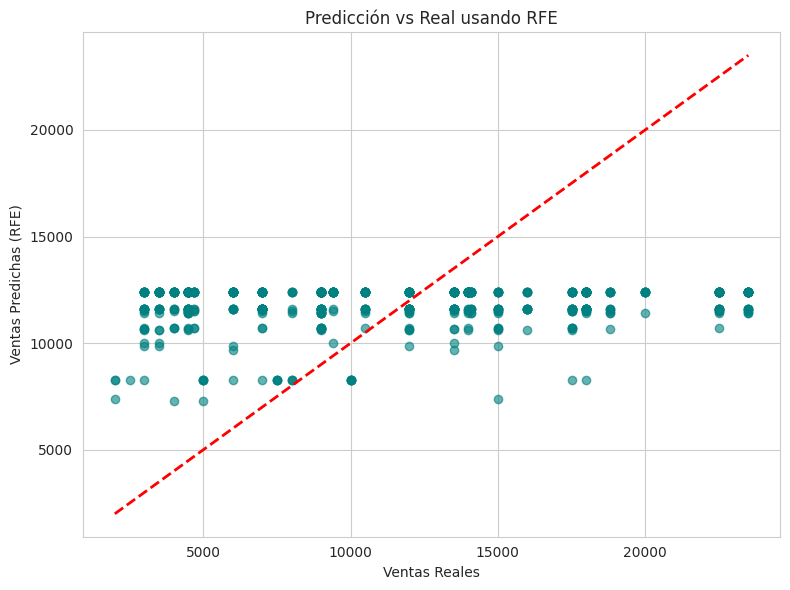

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1️⃣ Aplicar RFE
modelo_base = LinearRegression()
rfe = RFE(modelo_base, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_train, y_train)

# 2️⃣ Entrenar modelo con features seleccionadas
modelo_rfe = LinearRegression()
modelo_rfe.fit(X_rfe, y_train)

# 3️⃣ Transformar X_test con las mismas features
X_test_rfe = rfe.transform(X_test)
y_pred_rfe = modelo_rfe.predict(X_test_rfe)

# 4️⃣ Gráfico de Predicción vs Real
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rfe, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Ventas Reales")
plt.ylabel("Ventas Predichas (RFE)")
plt.title("Predicción vs Real usando RFE")
plt.tight_layout()
plt.show()

# **Conclusiones** **Preliminares**

Los resultados obtenidos son:

1.   La bebida mas elegida en el analisis es el **Latte**
2.   La hora del dia de **mas** consumo es entre **las 10 y la 11 de la mañana** y la de **menor** compra las **6 de la mañana**
3.   El dia con **mayor** frecuencia es el **Martes** y el de **menos** los **Lunes**.
4.   El **medio de pago **, para las bebidas mas caras es **la tarjeta de credito** y para importe menores es la **billetera virtual**
5.   El precio **promedio** esta entre los **3000 y 4000**
6.   La **tienda mas elegida** son l**os cafes de especialidad** y la **menos** elegidas son los **restaurant**.
7.   Entre los valores atipicos podemos ver los kioscos con precios de 4000 por bebida y el medio de pago menos frecuentes en los kioscos es el de billeteras virtuales.
















# Sección nueva